In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Before starting the code you have to upload the required dataset in the colab

In [ ]:
df = pd.read_csv('Facebook_Marketplace_data.csv')

In [ ]:
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour'] = df['status_published'].dt.hour
df['dayofweek'] = df['status_published'].dt.dayofweek

In [ ]:
# Question -1
hourly_reactions = df.groupby('hour')['num_reactions'].mean()
daily_reactions = df.groupby('dayofweek')['num_reactions'].mean()
print(hourly_reactions)

hour
0     261.839474
1     203.315725
2     163.907618
3     290.270208
4     242.685864
5     293.870968
6     340.213198
7     183.301549
8     204.796897
9     205.780761
10    234.508333
11    180.639456
12    196.053763
13    176.875000
14    261.333333
15    341.666667
16    283.250000
17    384.000000
18    351.750000
19    442.368421
20    417.288136
21    261.907895
22    238.376126
23    244.276850
Name: num_reactions, dtype: float64


In [ ]:
print(daily_reactions)

dayofweek
0    207.198189
1    197.299712
2    245.386340
3    262.702950
4    232.355446
5    233.209776
6    234.494806
Name: num_reactions, dtype: float64


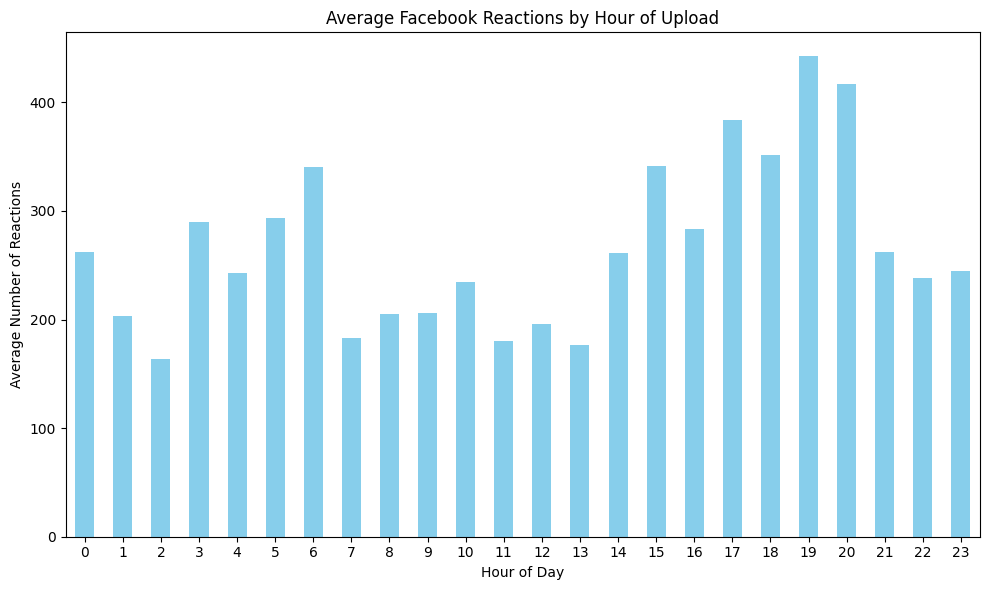


Interpretation:
Posts uploaded around 19 : 00 tend to receive the highest number of reactions on average.
Posts uploaded around 2 : 00 tend to receive the lowest number of reactions on average.


In [ ]:
# Plot bar chart
plt.figure(figsize=(10,6))
hourly_reactions.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.title('Average Facebook Reactions by Hour of Upload')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Identify peak hours and days
peak_hour = hourly_reactions.idxmax()
lowest_hour = hourly_reactions.idxmin()
print("\nInterpretation:")
print("Posts uploaded around", peak_hour , ": 00"+" tend to receive the highest number of reactions on average.")
print("Posts uploaded around", lowest_hour , ": 00"+" tend to receive the lowest number of reactions on average.")

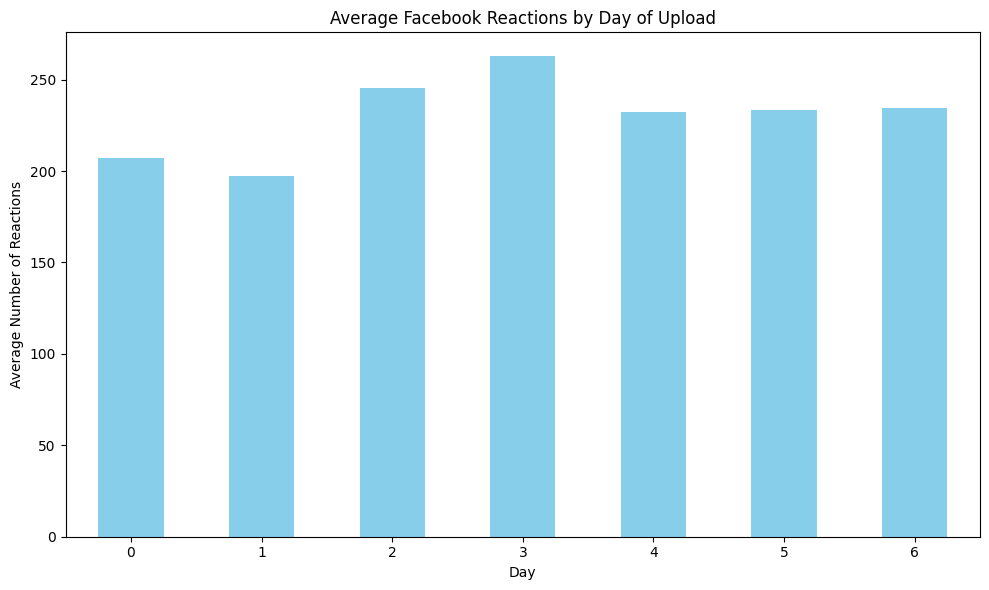


Interpretation:
Posts uploaded on Thursday  tend to receive the highest number of reactions on average.
Posts uploaded on Tuesday  tend to receive the lowest number of reactions on average.

Conclusion:
To maximize engagement, consider posting content in the evening around 19:00 and especially on Thursdays.


In [ ]:
# Plot bar chart
plt.figure(figsize=(10,6))
daily_reactions.plot(kind='bar', color='skyblue')
plt.xlabel('Day')
plt.ylabel('Average Number of Reactions')
plt.title('Average Facebook Reactions by Day of Upload')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Identify peak hours and days
peak_day = daily_reactions.idxmax()
lowest_day = daily_reactions.idxmin()
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
peak_day = day[peak_day]
lowest_day = day[lowest_day]
print("\nInterpretation:")
print("Posts uploaded on", peak_day ," tend to receive the highest number of reactions on average.")
print("Posts uploaded on", lowest_day ," tend to receive the lowest number of reactions on average.")
print("\nConclusion:")
print("To maximize engagement, consider posting content in the evening around 19:00 and especially on Thursdays.")

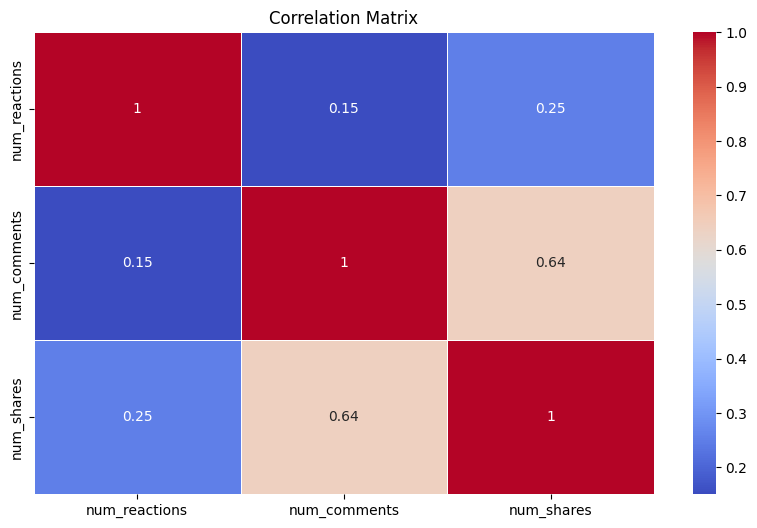


Interpretation and Conclusion : 
As the value of the Correlation coefficient between the variables num_reactions and num_comments is 0.15084290344217685, it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.
As the value of the Correlation coefficient between the variables num_reactions and num_shares is 0.25072251662831907, , it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.


In [ ]:
# Question -2
df_select = df[['num_reactions','num_comments','num_shares']]
corr_matrix = df_select.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print('\nInterpretation and Conclusion : ')
print(f'As the value of the Correlation coefficient between the variables num_reactions and num_comments is {corr_matrix.loc["num_reactions","num_comments"]}, it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.')
print(f'As the value of the Correlation coefficient between the variables num_reactions and num_shares is {corr_matrix.loc["num_reactions","num_shares"]}, , it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.')

In [ ]:
# Question 3

# Drop irrelevant or empty columns
df_clean = df.drop(columns=['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'])

# Encode 'status_type'
le = LabelEncoder()
df_clean['status_type_encoded'] = le.fit_transform(df_clean['status_type'])

# Select features for clustering
features = ['status_type_encoded', 'num_reactions', 'num_comments', 'num_shares',
            'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

X = df_clean[features].fillna(0)
status_type = X.iloc[:,0]
X_1 = X.iloc[:,1:]
# Normalize features
scaler = MinMaxScaler()
X_1 = scaler.fit_transform(X_1)
X_scaled = np.column_stack((status_type, X_1))
# print(X_1)
print(X_scaled)

[[3.00000000e+00 1.12314225e-01 2.43925679e-02 ... 6.36942675e-03
  1.96078431e-02 0.00000000e+00]
 [1.00000000e+00 3.18471338e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 4.81953291e-02 1.12434493e-02 ... 6.36942675e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 4.24628450e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.45222930e-02 5.71700810e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.60934183e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
print(X)

      status_type_encoded  num_reactions  num_comments  num_shares  num_likes  \
0                       3            529           512         262        432   
1                       1            150             0           0        150   
2                       3            227           236          57        204   
3                       1            111             0           0        111   
4                       1            213             0           0        204   
...                   ...            ...           ...         ...        ...   
7045                    1             89             0           0         89   
7046                    1             16             0           0         14   
7047                    1              2             0           0          1   
7048                    1            351            12          22        349   
7049                    1             17             0           0         17   

      num_loves  num_wows  

In [ ]:
pip install kneed

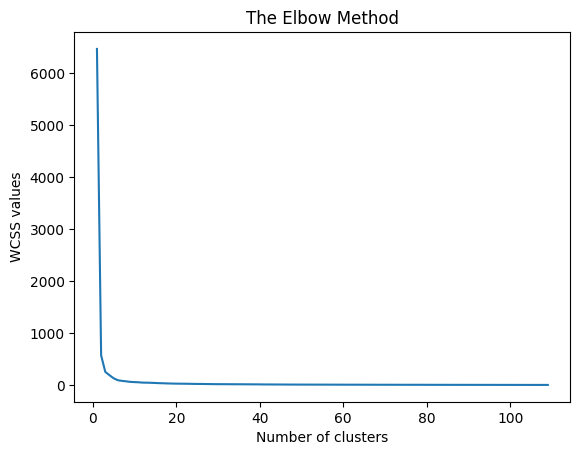

The optimal number of clusters (elbow) is: 4


In [ ]:
# Question 4
from kneed import KneeLocator

wcss = []

for i  in range(1,110):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled)
  # Compute WCSS values
  wcss.append(kmeans.inertia_)

plt.plot(range(1,110), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

knee_locator = KneeLocator(range(1, 110), wcss, curve="convex", direction="decreasing")
print("The optimal number of clusters (elbow) is:", knee_locator.knee)

In [ ]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

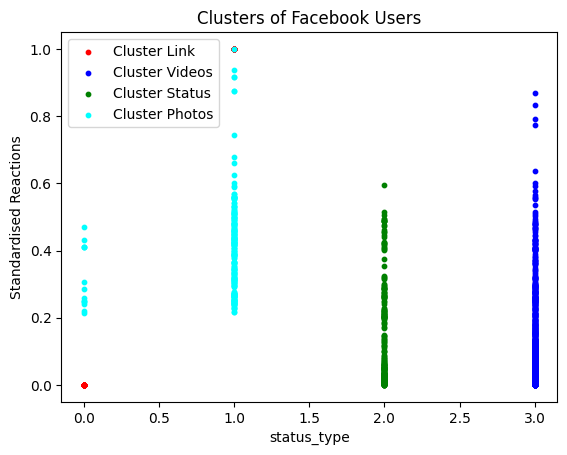

In [ ]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 0], s = 10, c='red', label = 'Cluster Link')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 10, c='blue', label = 'Cluster Videos')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 10, c='green', label = 'Cluster Status')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 10, c='cyan', label = 'Cluster Photos')
#kmeans.cluster_centroid_attribute
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, cmap='yellow', label = 'Centroids')
plt.title('Clusters of Facebook Users')
plt.xlabel('status_type')
plt.ylabel('Standardised Reactions')
plt.legend()
plt.show()


In [ ]:
# Question 5
# Count of different post types
post_type_counts = df['status_type'].value_counts()
post_type_counts


,count
status_type,
photo,4288
video,2334
status,365
link,63


In [ ]:
# Question 6

# Group by 'status_type' and calculate the mean for the required columns
average_metrics = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads','num_angrys']].mean()

# Display the result
print(average_metrics)

             num_reactions  num_comments  num_shares   num_likes  num_loves  \
status_type                                                                   
link            370.142857      5.698413    4.396825  369.619048   0.301587   
photo           181.290345     15.993470    2.553871  178.778451   1.445196   
status          438.783562     36.238356    2.558904  435.528767   1.561644   
video           283.409597    642.478149  115.679949  243.015424  35.540274   

             num_wows  num_hahas  num_sads  num_angrys  
status_type                                             
link         0.190476   0.031746  0.000000    0.000000  
photo        0.684701   0.190765  0.142491    0.045709  
status       1.172603   0.109589  0.386301    0.024658  
video        2.448158   1.735219  0.413882    0.254070  
